## Connecting to 'demo' postgres Database using psycopg2 and Doing CRUD operations
### by ~ Saikiran Dasari

## Import the required modules

In [1]:
import psycopg2
import psycopg2.extras

## Table of Contents: <a id = "toc"></a>

1. [CREATE a TABLE (Using Try-Except-Finally Block)](#Section1)


2. [INSERT Data into the above Table created [DML]](#Section2)

    * [2.2 INSERT multiple Values](#section2.2)
    
    
3. [Program without Using TRY - EXCEPT - FINALLY  blocks](#TryExceptFinally)


4. [Performing DDL Operations Seperately](#DDL)

    * [CREATE table](#create)
    
    * [DROP table](#drop)
    
    * [RENAME table](#rename)
    
    * [TRUNCATE table](#truncate)
    
    
5. [DQL (Data Query Language)](#dql)


6. [DML (Data Manipulation Commands)](#dml)

    * [INSERT](#insert)
    
    * [UPDATE](#update)
    
    * [DELETE](#delete)
    
    
7. [Context Manager(How to use it? using WITH Clause)](#contextManager)


## -> Write the Program to make a proper connection to postgreSQL database

## Task 1:

In [10]:
hostname = 'localhost'
database = 'demo'
username = 'postgres'
pwd = 'Your_Pwd'
port_id = 5432

In [11]:
conn = psycopg2.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = port_id)

conn.close()

## Task 2:

**let's place the above db connection cmds inside the TRY and EXCEPT Block(In case if database connection fails it should not crash the program, but we will be able to capture the exception!**

In [12]:
# This connect function will open a DB session, where we can perform any db transactions, like DDL,DQL or DML etc..
try:
    conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

    conn.close()
    
except Exception as error:
    print(error)
    
## Exception Error printed as : connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "postgre"
    

## Task 3:

**In order to perform any db transaction, we need to open a CURSOR**

**CURSOR will help us in performin any kind of SQL operations, it stores the values that will be returned from those SQL operations**

- NOTE: Make sure that database connection is always closed and also CURSOR is also closed

- NOTE: we need to place the both the close() method connection inside the FINNALY Block

- NOTE: Makesure that if and only if the conn and curr connections are OPEN then only CLOSE the both connections (for that assign 2 objects and give NONE and use IF statements inside FINALLY block)

In [ ]:
try:
    conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

    cur = conn.cursor()
  # this is not the best practice to assing the close() methods inside the TRY block!  
    cur.close()
    conn.close()
    
    
except Exception as error:
    print(error)

**FINALLY Block: Whether there is an exception or No Exception, whatever block of code you have written inside FINALLY will be executed!**

In [13]:
hostname = 'localhost'
database = 'demo'
username = 'postgres'
pwd = 'Your_pwd'
port_id = 5432
# Now assign None value to the cur and conn variables! at the beginning of program
conn = None
cur = None

In [14]:
try:
    conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

    cur = conn.cursor()
    
except Exception as error:
    print(error)
    
finally:
    if cur is not None:   #means if the cursor is open only when i want to close!
        cur.close()
    
    if conn is not None:
        conn.close()
       

- This is how our Outline should looklike when we want to connect to the postgreSQL database

## 1) CREATE a table using (Try-Except-Finally block) <a id="Section1"></a>

**CREATE a table called 'employee'**

- NOTE: Syntax and the code is exactly same as SQL**

- Place your CREATE code in TRY Block and store in a variable and at the end use cur.execute(var_name) method and pass the variable inside ()

- We need to compulsorily use: conn.commit() method: as it will SAVE whatever transactions we have done into the database

In [18]:
try:
    conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

    cur = conn.cursor()
    
    create_script =  '''
                        CREATE TABLE IF NOT EXISTS employee (
                            id INT PRIMARY KEY,
                            name VARCHAR(40) NOT NULL,
                            salary INT,
                            dept_id VARCHAR(30))
                      '''
    cur.execute(create_script)
    
    conn.commit()
    
    
except Exception as error:
    print(error)
    
finally:
    if cur is not None:   #means if the cursor is open only when i want to close!
        cur.close()
    
    if conn is not None:
        conn.close()

**The employee table has been created successfully with 4 columns, Verified in pgAdmin4**

## 2.1 INSERT Data into the above Table created [DML] <a id="Section2"></a>

- Create a variable and store the INSERT command in it

- Avoid SQL Injection (by not placing all the VALUES, instead just use PLACEHOLDERS like %s for each Values)

- create another variable for passing the values in TUPLE () type, you can add a LIST [(),(),..] to pass multiple values

In [22]:
conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

cur = conn.cursor()

insert_script = '''
                    INSERT INTO employee (id, name, salary, dept_id) 
                    VALUES (%s, %s, %s, %s)
                '''
insert_value = (1, 'Sid', '100000', 'S1')
cur.execute(insert_script, insert_value)

conn.commit()

![1RetrievingInsertedData](1RetrievingInsertedData.png)

## 2.2 INSERT multiple Values now! <a id="section2.2"></a>

- You can Use DROP Table command, so every time you insert data into the table, It will create a New table everytime to avoid any "UniqueViolation: duplicate key value violates unique constraint "employee_pkey"
DETAIL:  Key (id)=(1) already exists." OR 'IndexError: list index out of range' errors!

- use insert with TUPLES it around 200 time faster than executemany in psycopg2

In [41]:
try:
    conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

    cur = conn.cursor()
    
    
    # DROP Table is exists:
    cur.execute('DROP TABLE IF EXISTS employee') # This will makesure that everytime i execute the cmds, It will DROP
    
    
    # CREATE Table:
    create_script =  '''
                        CREATE TABLE IF NOT EXISTS employee (
                            id INT PRIMARY KEY,
                            name VARCHAR(40) NOT NULL,
                            salary INT,
                            dept_id VARCHAR(30))
                      '''
    cur.execute(create_script)
    

    # INSERT Columns
    insert_script = '''
                        INSERT INTO employee (id, name, salary, dept_id) 
                        VALUES (%s, %s, %s, %s)
                    '''

    
    # INSERT multiple records
    insert_values = [(1, 'Sid', '100000', 'S1'), 
                     (2, 'Nani', '200000', 'S2'), 
                     (3, 'Xavier', '60000', 'S3') ]


    # Using for loop to insert multiple record one at a time
    for record in insert_values:
        cur.execute(insert_script, record)
    
    
    conn.commit()
    
    
except Exception as error:
    print(error)
    
finally:
    if cur is not None:   #means if the cursor is open only when i want to close!
        cur.close()
    
    if conn is not None:
        conn.close()

![2RetrievingInsertedData](2RetrievingInsertedData.png)

## 3. Program without Using TRY - EXCEPT - FINALLY  blocks <a id="TryExceptFinally"></a>

In [126]:
conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)

# Error: InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block
# If don't want to have to commit each entry to the database, you can add the following line:
conn.autocommit = True  # How to set auto commit in psycopg2 ?  https://stackoverflow.com/questions/18068901/python-psycopg2-not-inserting-into-postgresql-table

cur = conn.cursor()

# DROP Table is exists:
cur.execute('DROP TABLE IF EXISTS employee') # This will makesure that everytime i execute the cmds, It will DROP the table 1st & it will insert all the data!

# CREATE Table:
create_script =  '''
                        CREATE TABLE IF NOT EXISTS employee (
                            id INT PRIMARY KEY,
                            name VARCHAR(40) NOT NULL,
                            salary INT,
                            dept_id VARCHAR(30))
                      '''
cur.execute(create_script)


# INSERT Columns
insert_script = '''
                    INSERT INTO employee (id, name, salary, dept_id) 
                    VALUES (%s, %s, %s, %s)
                '''

# INSERT multiple records
insert_values = [(1, 'Sid', '100000', 'S1'), 
                 (2, 'Nani', '200000', 'S2'), 
                 (3, 'Xavier', '60000', 'S3') ]


# Using for loop to insert multiple record one at a time
for record in insert_values:
    cur.execute(insert_script, record)

conn.commit()

## 4. Performing DDL Operations Seperately: <a id = "DDL"></a>

List of DDL commands: 

1. CREATE: This command is used to create the database or its objects (like table, index, function, views, store procedure, and triggers).
2. DROP: This command is used to delete objects from the database.
3. ALTER: This is used to alter the structure of the database.
4. TRUNCATE: This is used to remove all records from a table, including all spaces allocated for the records are removed.
5. RENAME: This is used to rename an object existing in the database.

### DROP the employee Table [DDL]

- After running the above query whole database will be deleted.

### CREATE  Table <a id = "create"></a>

In [107]:
conn_saved
conn.autocommit = True  
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS employee') 

# CREATE Table:
create_script =  '''
                        CREATE TABLE IF NOT EXISTS employee (
                            id INT PRIMARY KEY,
                            name VARCHAR(40) NOT NULL,
                            salary INT,
                            dept_id VARCHAR(30))
                      '''
cur.execute(create_script)
conn.commit()

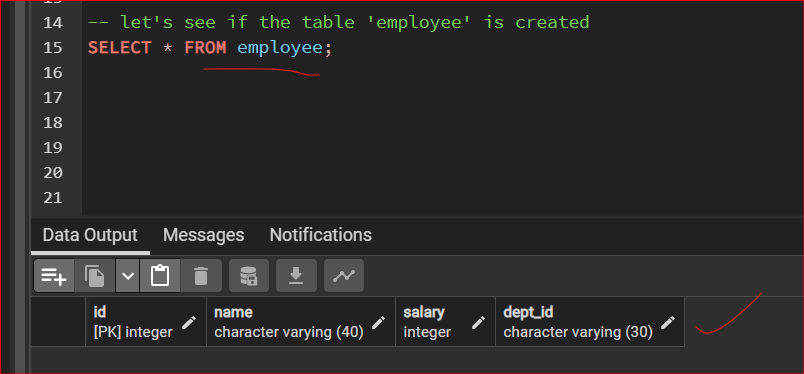

### DROP table <a id = "drop"></a>

In [106]:
conn_saved

conn.autocommit = True  # How to set auto commit in psycopg2 ?  https://stackoverflow.com/questions/18068901/python-psycopg2-not-inserting-into-postgresql-table

cur = conn.cursor()

# DROP Table is exists:
cur.execute('DROP TABLE IF EXISTS employee') # This will makesure that everytime i execute the cmds, It will DROP the table 1st & it will insert all the data!

### RENAME table name   <a id = "rename"></a>
- We need to Use ALTER, TASK: rename employee to employee1
-- This is used to rename an object existing in the database.

In [108]:
conn_saved
# conn.autocommit = True  
cur = conn.cursor()

# Rename Script
rename_script = '''ALTER TABLE employee
                 RENAME TO employee1;'''

cur.execute(rename_script)
conn.commit()

![3RenameTable](3RenameTable.png)


## WITH Clause

### INSERT Columns with Values [DML] to perform TRUNCATE operation

**Here, we can bypass the above 3 variable by using them in WITH statement**

In [124]:
# As connections (and cursors) are context managers, you can simply use the with statement to automatically commit/rollback a transaction on leaving the context:(https://stackoverflow.com/questions/18068901/python-psycopg2-not-inserting-into-postgresql-table)
with conn, conn.cursor() as cur:  # start a transaction and create a cursor
    # INSERT Columns
    insert_script = '''
                        INSERT INTO employee1 (id, name, salary, dept_id) 
                        VALUES (%s, %s, %s, %s)
                    '''

    # INSERT multiple records
    insert_values = [(1, 'Sid', '100000', 'S1'), 
                     (2, 'Nani', '200000', 'S2'), 
                     (3, 'Xavier', '60000', 'S3') ]


    # Using for loop to insert multiple record one at a time
    for record in insert_values:
        cur.execute(insert_script, record)


![4RetrieveInsertedMultipleValues](4RetrieveInsertedMultipleValues.png)

### TRUNCATE the employee1 table [DDL]  <a id = "truncate"></a>
-  After running the above query  the data will be deleted but the structure will remain in the memory for further operations.

In [127]:
with conn, conn.cursor() as cur:
    # Rename Script
    truncate_script = '''TRUNCATE TABLE employee;'''

    cur.execute(truncate_script)

![5TruncatedTable](5TruncatedTable.png)

# 5. DQL (Data Query Language) <a id = "dql"></a>

## 5.1 Retrieve the Records [DQL]

In [128]:
with conn, conn.cursor() as cur:
    cur.execute('SELECT * FROM employee1')
    print(cur.fetchall())

[(1, 'Sid', 100000, 'S1'), (2, 'Nani', 200000, 'S2'), (3, 'Xavier', 60000, 'S3')]


- here each TUPLE holds one record

**To iterate each Tuple record using FOR loop**

In [131]:
with conn, conn.cursor() as cur:
    cur.execute('SELECT * FROM employee1')
    for record in cur.fetchall():
        print(record)

(1, 'Sid', 100000, 'S1')
(2, 'Nani', 200000, 'S2')
(3, 'Xavier', 60000, 'S3')


**To Access only specific columns from table using INDEX**

In [132]:
with conn, conn.cursor() as cur:
    cur.execute('SELECT * FROM employee1')
    for record in cur.fetchall():
        print(record[1], record[2])

Sid 100000
Nani 200000
Xavier 60000


- What if the database to too large, in that case we will be unable to Trace specific INDEX and Retrive records based on the index, For that problem, we will be retrieving the data using COMLUM names instead of Index, so, we will be using extras module to return the Fetch data in dictionary format

## 5.2 To Fetch the data, by simply using Column names

**We need to Import a module which is inside the psycopg2 called as .extras**

**With this we can simply Call Column Names and Retrieve the Records**

In [133]:
import psycopg2.extras

with conn, conn.cursor(cursor_factory = psycopg2.extras.DictCursor) as cur:
    cur.execute('SELECT * FROM employee1')
    for record in cur.fetchall():
        print(record['name'], record['salary'])  # Simply Use Column Names!
        

Sid 100000
Nani 200000
Xavier 60000


## Entire CODE program:

# 6. DML (Data Manipulation Commands) <a id = "dml"></a>

**List of DML commands:**

**INSERT : It is used to insert data into a table.** <a id = "insert"></a>
    
**UPDATE: It is used to update existing data within a table.**
    
**DELETE : It is used to delete records from a database table.**

## 6.1 INSERT records inside table: <a id = "insert"></a>

- It is used to insert data into a table.

In [134]:
import psycopg2.extras

try:
    conn = psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id)
    
    # Made changes here!
    cur = conn.cursor(cursor_factory = psycopg2.extras.DictCursor)
    
    
    # DROP Table is exists:
    cur.execute('DROP TABLE IF EXISTS employee') # It will DROP if exists any!?
    
    
    # CREATE Table:
    create_script =  '''
                        CREATE TABLE IF NOT EXISTS employee (
                            id INT PRIMARY KEY,
                            name VARCHAR(40) NOT NULL,
                            salary INT,
                            dept_id VARCHAR(30))
                      '''
    cur.execute(create_script)
    

    # INSERT Columns
    insert_script = '''
                        INSERT INTO employee (id, name, salary, dept_id) 
                        VALUES (%s, %s, %s, %s)
                    '''

    
    # INSERT multiple records
    insert_values = [(1, 'Sid', '100000', 'S1'), 
                     (2, 'Nani', '200000', 'S2'), 
                     (3, 'Xavier', '60000', 'S3') ]


    # Using for loop to insert multiple record one at a time
    for record in insert_values:
        cur.execute(insert_script, record)
        
        
    cur.execute('SELECT * FROM employee')
    for record in cur.fetchall():
        print(record['name'], record['salary'])  # Simply Use Column Names!
    
    
    conn.commit()
    
    
except Exception as error:
    print(error)
    
finally:
    if cur is not None:   #means if the cursor is open only when i want to close!
        cur.close()
    
    if conn is not None:
        conn.close()

Sid 100000
Nani 200000
Xavier 60000


## 6.2 UPDATE the Records <a id = "update"></a>

- Create a variable and store the UPDATE cmd

**Task:  INCREASE the Salary by 50%**

In [135]:
# As, in above, we have CLOSED the connection, we need to connect again!
conn = psycopg2.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = port_id)

In [136]:
with conn, conn.cursor(cursor_factory = psycopg2.extras.DictCursor) as cur:
        update_script = '''
                            UPDATE employee
                            SET salary = salary + (salary * 0.5)
                        '''
        cur.execute(update_script)
        
        
        cur.execute('SELECT * FROM employee')
        for record in cur.fetchall():
            print(record['name'], record['salary'])

Sid 150000
Nani 300000
Xavier 90000


![6UpdatedRecord](6UpdatedRecord.png)

## 6.3 DELETE Records from Table <a id = "delete"></a>

**Task: Delete Nani from the employee**

- Create a variable and store the DELETE cmd 

In [137]:
with conn, conn.cursor(cursor_factory = psycopg2.extras.DictCursor) as cur:
    delete_script = ' DELETE FROM employee WHERE name = %s '
    delete_record = ('Nani', )
    cur.execute(delete_script, delete_record)
    
    cur.execute('SELECT * FROM employee')
    for record in cur.fetchall():
        print(record)


[1, 'Sid', 150000, 'S1']
[3, 'Xavier', 90000, 'S3']


## Conclusion: What have we learnt ?

**We have Created a Setup to Connect to postgreSQL using psycopg2 library**

**We have saw how to use a Proper/Best practice Code for postgreSQL commands**

**We have saw Program Code with and without TRY-EXCEPT-FINALLY Block**

**We have Performend various DDL,DQL,and DML operations**

**Finally, we will see**

# 7. "Context Manager" <a id = "contextManager"></a>

### Inorder to use Context manager we need to use WITH Clause for Connection and Cursor for entire SQL operations

### Advantages of with Clause:

**WITH clause will take care of closing the CURSOR for us! i.e no need to use "cur.execute()"" command**

**WITH clause will take care of commiting the database transaction, i.e no need to use "conn.commit()"**
- If there are no exceptions all the transactions will be commited & if there are exceptions all the Transactions wi;; be Rollback

- WITH clause will not take care of closing the database connection!

In [140]:
import psycopg2
import psycopg2.extras

hostname = 'localhost'
database = 'demo'
username = 'postgres'
pwd = 'Your_Pwd'
port_id = 5432
conn = None

try:
    with psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id) as conn:

        with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur:

            cur.execute('DROP TABLE IF EXISTS employee2')

            create_script = ''' CREATE TABLE IF NOT EXISTS employee2 (
                                    id      int PRIMARY KEY,
                                    name    varchar(40) NOT NULL,
                                    salary  int,
                                    dept_id varchar(30)) '''
            cur.execute(create_script)

            insert_script  = 'INSERT INTO employee2 (id, name, salary, dept_id) VALUES (%s, %s, %s, %s)'
            insert_values = [(1, 'James', 12000, 'D1'), (2, 'Robin', 15000, 'D1'), (3, 'Xavier', 20000, 'D2')]
            for record in insert_values:
                cur.execute(insert_script, record)

            update_script = 'UPDATE employee2 SET salary = salary + (salary * 0.5)'
            cur.execute(update_script)

            delete_script = 'DELETE FROM employee2 WHERE name = %s'
            delete_record = ('James',)
            cur.execute(delete_script, delete_record)

            cur.execute('SELECT * FROM employee2')
            for record in cur.fetchall():
                print(record['name'], record['salary'])
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

Robin 22500
Xavier 30000


![7ContextManagerWithClauseOP](7ContextManagerWithClauseOP.png)

 [Click here to redirect to the table of Contents at TOP](#toc)